<a href="https://colab.research.google.com/github/KendallScott/QTW/blob/main/Case%20Study%206/Case_Study_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
pip install tensorflow

In [114]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from numpy import arange

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [115]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [116]:
df = pd.read_csv ('/content/drive/MyDrive/all_train.csv')

print(df)

<ipython-input-116-e0267c150f95>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('/content/drive/MyDrive/all_train.csv')


         # label        f0        f1        f2        f3        f4        f5  \
0            1.0 -0.346368  0.416306  0.999236  0.475342  0.427493 -0.005984   
1            1.0  1.708236 -0.319394 -1.241873 -0.887231 -0.871906 -0.005984   
2            0.0 -0.360693  1.794174  0.264738 -0.472273 -0.292344 -1.054221   
3            1.0 -0.377914 -0.103932 -0.649434 -2.125015 -1.643797 -0.005984   
4            0.0 -0.067436 -0.636762 -0.620166 -0.062551  1.588715 -0.005984   
...          ...       ...       ...       ...       ...       ...       ...   
2662319      1.0 -1.022220  0.685206  1.662386 -1.369679  0.009864 -0.005984   
2662320      0.0 -0.147244  1.123576 -1.253563 -2.658278  0.556572 -0.005984   
2662321      1.0  0.696911  0.148010  1.517821 -0.669574  1.040575  0.850488   
2662322      1.0 -0.573871 -0.479685  1.165852  1.900469  1.649824 -1.054221   
2662323      0.0  0.212295  0.634538  0.074785 -0.217291  0.335480  0.850488   

               f6        f7        f8  

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662324 entries, 0 to 2662323
Data columns (total 29 columns):
 #   Column   Dtype  
---  ------   -----  
 0   # label  float64
 1   f0       float64
 2   f1       float64
 3   f2       float64
 4   f3       float64
 5   f4       float64
 6   f5       float64
 7   f6       float64
 8   f7       float64
 9   f8       float64
 10  f9       float64
 11  f10      float64
 12  f11      float64
 13  f12      float64
 14  f13      float64
 15  f14      float64
 16  f15      float64
 17  f16      float64
 18  f17      float64
 19  f18      float64
 20  f19      float64
 21  f20      float64
 22  f21      float64
 23  f22      float64
 24  f23      float64
 25  f24      float64
 26  f25      object 
 27  f26      float64
 28  mass     float64
dtypes: float64(28), object(1)
memory usage: 589.0+ MB


In [118]:
df.tail()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
2662319,1.0,-1.022220,0.685206,1.662386,-1.369679,0.009864,-0.005984,-0.542164,1.443135,1.723236,...,-0.331915,0.627288,-0.887394,-0.573682,-0.107037,-0.599261,-0.356991,-8.308385610580444336e-01,-1.043036,499.999969
2662320,0.0,-0.147244,1.123576,-1.253563,-2.658278,0.556572,-0.005984,0.504325,-0.704352,0.813040,...,0.841893,0.043280,-1.610396,-0.573682,0.201967,0.466685,-0.374480,-9.240132570266723633e-02,0.684956,1500.000000
2662321,1.0,0.696911,0.148010,1.517821,-0.669574,1.040575,0.850488,0.209915,1.728897,-0.227475,...,1.629713,1.164412,-0.516994,-0.573682,0.063803,-0.378487,-0.311514,1.073438048362731934e+00,1.503263,750.000000
2662322,1.0,-0.573871,-0.479685,1.165852,1.900469,1.649824,-1.054221,1.781100,-0.622667,-0.152846,...,-1.212855,-0.056705,0.123833,-0.573682,-0.887653,0.735297,1.012476,2.139665365219116211e+00,0.923148,1250.000000
2662323,0.0,0.212295,0.634538,0.074785,-0.217291,0.335480,0.850488,-0.604766,-1.772659,-1.471029,...,-0.474553,-0.080530,1.453642,1.743123,-0.219916,-0.129504,-0.288896,-,NaN,NaN


In [119]:
df = df.drop(columns=['f25'])

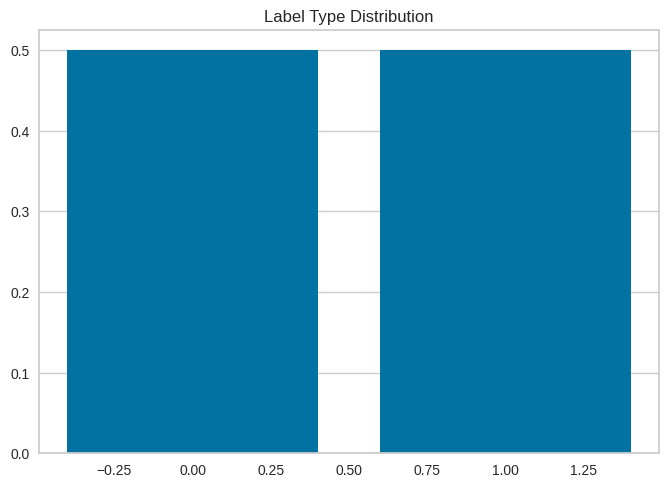

In [120]:
plt.bar(df['# label'].value_counts(normalize=True).index,df['# label'].value_counts(normalize=True))
plt.grid(axis='x')
plt.title('Label Type Distribution')
plt.show()

In [121]:
df['# label'].value_counts(normalize=True)



1.0    0.500183
0.0    0.499817
Name: # label, dtype: float64

In [122]:
df.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f17,f18,f19,f20,f21,f22,f23,f24,f26,mass
count,2.662324e+06,2.662324e+06,2.662324e+06,2.662324e+06,2.662324e+06,2.662324e+06,2.662324e+06,2.662324e+06,2.662324e+06,2.662324e+06,...,2.662324e+06,2.662324e+06,2.662324e+06,2.662324e+06,2.662324e+06,2.662324e+06,2.662324e+06,2.662324e+06,2.662323e+06,2.662323e+06
mean,5.001829e-01,1.621743e-02,2.351038e-04,-2.207591e-05,1.088291e-02,2.674626e-06,2.881230e-03,1.838971e-02,-6.488444e-05,1.714611e-04,...,5.203713e-03,1.196884e-02,-2.586887e-04,4.771017e-04,2.776270e-04,1.212224e-02,9.966577e-03,5.560535e-03,1.563178e-02,1.000235e+03
std,5.000001e-01,1.004723e+00,9.975456e-01,1.000298e+00,9.959870e-01,1.000104e+00,1.000682e+00,9.868849e-01,9.962854e-01,9.997890e-01,...,1.001055e+00,1.003273e+00,1.000033e+00,9.999307e-01,1.000162e+00,1.009976e+00,1.005184e+00,1.011678e+00,9.827373e-01,3.534339e+02
min,0.000000e+00,-1.960549e+00,-2.365346e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732354e+00,...,-8.154401e-01,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.284453e-01,-7.337889e-01,-8.663596e-01,-6.089737e-01,-8.652635e-01,-1.054221e+00,-7.562521e-01,-7.010117e-01,-8.651361e-01,...,-8.154401e-01,-7.424353e-01,-7.210817e-01,-8.655049e-01,-5.736825e-01,-5.420824e-01,-5.115696e-01,-3.543378e-01,-7.946043e-01,7.500000e+02
50%,1.000000e+00,-3.985431e-02,9.096891e-04,2.754575e-04,1.987585e-02,-2.630561e-04,-5.983562e-03,-1.498733e-01,-6.831819e-04,7.993411e-04,...,-8.154401e-01,-8.930028e-02,2.458355e-05,8.871966e-04,-5.736825e-01,-1.603483e-01,-3.143242e-01,-3.264517e-01,-8.851350e-02,1.000000e+03
75%,1.000000e+00,6.903979e-01,7.343818e-01,8.666137e-01,6.808476e-01,8.662663e-01,8.504885e-01,7.698949e-01,7.012315e-01,8.658589e-01,...,1.226331e+00,6.424824e-01,7.204899e-01,8.657857e-01,-5.736825e-01,4.818973e-01,1.643988e-01,-2.335783e-01,7.618142e-01,1.250000e+03
max,1.000000e+00,4.007255e+00,2.365287e+00,1.732370e+00,3.657407e+00,1.731978e+00,4.482618e+00,3.581360e+00,2.758590e+00,1.731450e+00,...,1.226331e+00,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.267271e+00,9.276883e+00,1.499064e+01,4.405011e+00,1.500000e+03


In [123]:
df = df.dropna()

In [124]:

# Make dataframe for model input
X = df.loc[:, df.columns != '# label']

#one hot encoding categorical variables for model
cols = X.columns
num_cols = X._get_numeric_data().columns

#creating dataframe of numeric columns
scaler = MinMaxScaler()
num_df = scaler.fit_transform(X[num_cols])

X=pd.DataFrame(num_df,columns=X[num_cols].columns, index=X[num_cols].index)

#save column names
col_names = X.columns
X

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f17,f18,f19,f20,f21,f22,f23,f24,f26,mass
0,0.270482,0.588008,0.788389,0.766671,0.623429,0.189321,0.759448,0.562388,0.952320,1.0,...,0.0,0.768115,0.558643,0.609172,1.0,0.645752,0.648278,0.569167,0.690626,0.50
1,0.614763,0.432490,0.141518,0.666759,0.248326,0.189321,0.458536,0.311728,0.689445,1.0,...,1.0,0.072438,0.307730,0.071580,0.0,0.177801,0.298751,0.570668,0.346664,0.25
2,0.268081,0.879274,0.576384,0.697186,0.415631,0.000000,0.284802,0.757963,0.866808,1.0,...,1.0,0.069624,0.618062,0.040736,0.0,0.283329,0.270735,0.570633,0.160059,0.25
3,0.265196,0.478036,0.312518,0.575997,0.025501,0.189321,0.611519,0.311344,0.343658,1.0,...,0.0,0.288630,0.498519,0.814225,0.0,0.307854,0.308446,0.569241,0.449355,0.75
4,0.317221,0.365402,0.320966,0.727229,0.958644,0.189321,0.368717,0.275334,0.597377,0.0,...,0.0,0.154773,0.189167,0.337358,1.0,0.414117,0.337846,0.622898,0.228605,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662318,0.476041,0.354221,0.149571,0.721615,0.059877,0.189321,0.335099,0.348564,0.646653,0.0,...,1.0,0.154664,0.495491,0.929128,0.0,0.358666,0.306441,0.571613,0.246263,0.00
2662319,0.157232,0.644851,0.979800,0.631383,0.502870,0.189321,0.376749,0.761539,0.997629,1.0,...,0.0,0.183862,0.637402,0.243719,0.0,0.323388,0.294881,0.569043,0.225885,0.00
2662320,0.303848,0.737517,0.138143,0.536895,0.660691,0.189321,0.534920,0.372251,0.734855,1.0,...,0.0,0.338419,0.509444,0.035030,0.0,0.351740,0.370986,0.568552,0.471416,1.00
2662321,0.445300,0.531294,0.938073,0.682719,0.800410,0.344007,0.490422,0.813341,0.434458,1.0,...,1.0,0.442153,0.755087,0.350632,0.0,0.339063,0.310644,0.570320,0.587689,0.25


In [125]:
#creating dataframe to find where there is high readmitted rates for a variable
y = df[['# label']].astype(np.float16)
#y_alt = pd.get_dummies(y_alt, columns=y_alt.columns)

In [126]:
y

,# label
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
2662318,0.0
2662319,1.0
2662320,0.0
2662321,1.0


In [128]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(27,)))
model.add(tf.keras.layers.Dense(100, activation='relu',name="Relu1"))
model.add(tf.keras.layers.Dense(79, activation='relu', name="Relu2"))
model.add(tf.keras.layers.Dense(56, activation='relu', name="Relu3"))
model.add(tf.keras.layers.Dense(23, activation='relu', name="Relu4"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', name="Activation"))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics = [tf.keras.metrics.AUC(from_logits=True), 'accuracy'])

es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

model.fit(X, y, epochs=10, batch_size=132, validation_split=0.2, callbacks=[es])

Epoch 1/10
16136/16136 [==============================] - 69s 4ms/step - loss: 0.3184 - auc_8: 0.9364 - accuracy: 0.8529 - val_loss: 0.3000 - val_auc_8: 0.9441 - val_accuracy: 0.8608
Epoch 2/10
16136/16136 [==============================] - 66s 4ms/step - loss: 0.2976 - auc_8: 0.9447 - accuracy: 0.8657 - val_loss: 0.2857 - val_auc_8: 0.9485 - val_accuracy: 0.8691
Epoch 3/10
16136/16136 [==============================] - 65s 4ms/step - loss: 0.2912 - auc_8: 0.9471 - accuracy: 0.8695 - val_loss: 0.2811 - val_auc_8: 0.9500 - val_accuracy: 0.8717
Epoch 4/10
16136/16136 [==============================] - 66s 4ms/step - loss: 0.2869 - auc_8: 0.9486 - accuracy: 0.8716 - val_loss: 0.2780 - val_auc_8: 0.9514 - val_accuracy: 0.8737
Epoch 5/10
16136/16136 [==============================] - 65s 4ms/step - loss: 0.2843 - auc_8: 0.9495 - accuracy: 0.8731 - val_loss: 0.2777 - val_auc_8: 0.9515 - val_accuracy: 0.8731
Epoch 6/10
16136/16136 [==============================] - 66s 4ms/step - loss: 0.2824

In [129]:
p = model.predict(X)
p = np.round(p,0)

83198/83198 [==============================] - 104s 1ms/step


In [130]:
classification_results = classification_report(y, p,output_dict=True)
classification_results

{'0.0': {'precision': 0.902933341454345,
  'recall': 0.8466934801461515,
  'f1-score': 0.873909526051536,
  'support': 1330674},
 '1.0': {'precision': 0.8557818810616381,
  'recall': 0.9090458521727572,
  'f1-score': 0.881610091108376,
  'support': 1331649},
 'accuracy': 0.8778810835499674,
 'macro avg': {'precision': 0.8793576112579915,
  'recall': 0.8778696661594544,
  'f1-score': 0.8777598085799561,
  'support': 2662323},
 'weighted avg': {'precision': 0.8793489773180295,
  'recall': 0.8778810835499674,
  'f1-score': 0.8777612186363111,
  'support': 2662323}}

In [131]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Relu1 (Dense)               (None, 100)               2800      
                                                                 
 Relu2 (Dense)               (None, 79)                7979      
                                                                 
 Relu3 (Dense)               (None, 56)                4480      
                                                                 
 Relu4 (Dense)               (None, 23)                1311      
                                                                 
 dropout_5 (Dropout)         (None, 23)                0         
                                                                 
 Activation (Dense)          (None, 1)                 24        
                                                                 
Total params: 16,594
Trainable params: 16,594
Non-trai

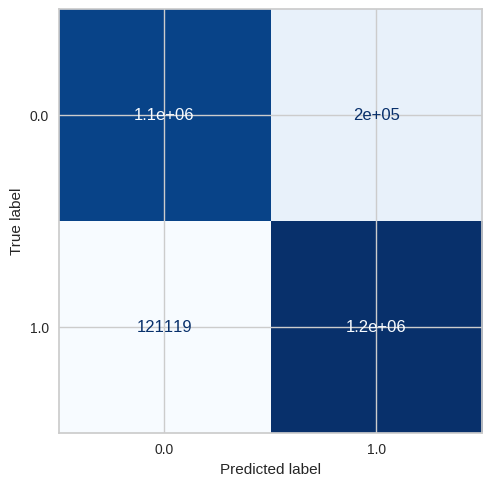

In [132]:
ConfusionMatrixDisplay.from_predictions(y,p,colorbar=False,cmap='Blues')

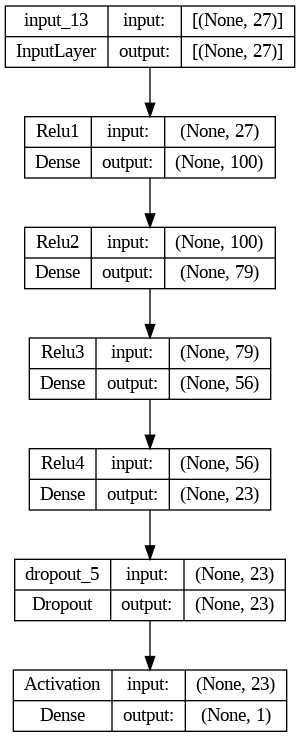

In [133]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [137]:
#adding in prediction from a random forest model into the training dataset, to compare performance, wtih a simpler Neural Network
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 624,
                            n_jobs = -1,
                            n_estimators= 50,
                            criterion= 'entropy',
                            class_weight='balanced')

RuntimeError: ignored

In [140]:
# Make dataframe for model input
X = df.loc[:, df.columns != '# label']

#one hot encoding categorical variables for model
cols = X.columns
num_cols = X._get_numeric_data().columns

#creating dataframe of numeric columns
scaler = MinMaxScaler()
num_df = scaler.fit_transform(X[num_cols])

X=pd.DataFrame(num_df,columns=X[num_cols].columns, index=X[num_cols].index)

#save column names
col_names = X.columns

y = df[['# label']].astype(np.float16)


In [145]:
X_train = X.sample(frac=0.8, random_state=42)
y_train = y.sample(frac=0.8, random_state=42)

# Dropping all those indexes from the dataframe that exists in the train_set
X_test = X.drop(X_train.index)
y_test = X.drop(y_train.index)
X_train.shape, X_test.shape

((2129858, 27), (532465, 27))

In [146]:
rf = rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/daal4py/sklearn/ensemble/_forest.py:453: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return super().fit(X, y, sample_weight=sample_weight)


In [148]:
rf_pred = rf.predict(X)

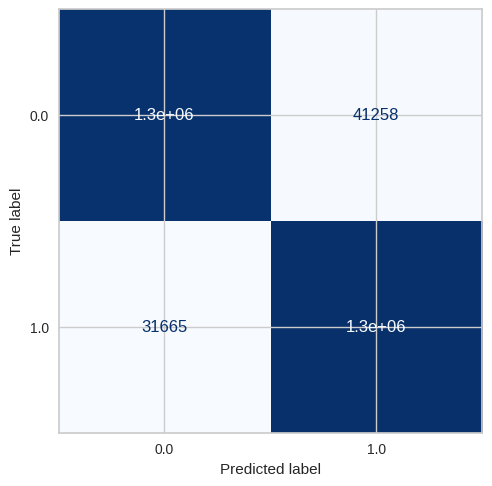

In [149]:
ConfusionMatrixDisplay.from_predictions(y,rf_pred,colorbar=False,cmap='Blues')

In [160]:
#Adding prediction to training data
rf_pred_proba = rf.predict_proba(X)

rf_pred_proba = pd.DataFrame(rf_pred_proba)
rf_pred_proba

,0,1
0,0.00,1.00
1,0.06,0.94
2,1.00,0.00
3,0.12,0.88
4,0.92,0.08
...,...,...
2662318,0.80,0.20
2662319,0.22,0.78
2662320,0.26,0.74
2662321,0.14,0.86


In [162]:
X['rf_pred'] = rf_pred_proba[0]

In [163]:
X['rf_pred'] = X['rf_pred'].astype(float)

In [164]:
X.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f18,f19,f20,f21,f22,f23,f24,f26,mass,rf_pred
count,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06,...,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06,2.662323e+06
mean,3.312385e-01,5.000558e-01,4.999641e-01,7.326141e-01,5.000237e-01,1.909215e-01,4.614736e-01,4.999216e-01,5.001801e-01,6.343163e-01,...,2.291419e-01,4.999050e-01,4.999958e-01,2.477374e-01,3.343216e-01,3.383778e-01,5.792230e-01,3.763112e-01,5.002353e-01,5.001669e-01
std,1.683573e-01,2.108694e-01,2.887251e-01,7.303200e-02,2.887041e-01,1.807316e-01,1.491631e-01,1.806028e-01,2.886390e-01,4.816214e-01,...,1.321025e-01,2.191094e-01,2.886221e-01,4.316986e-01,9.266787e-02,7.176632e-02,2.840767e-02,1.396376e-01,3.534339e-01,4.282456e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.064583e-01,3.448918e-01,2.499053e-01,6.871622e-01,2.502435e-01,0.000000e+00,3.443901e-01,3.728567e-01,2.503657e-01,0.000000e+00,...,1.298083e-01,3.419711e-01,2.500366e-01,0.000000e+00,2.834718e-01,3.011421e-01,5.691171e-01,2.611844e-01,2.500000e-01,4.000000e-02
50%,3.218426e-01,5.001985e-01,5.000500e-01,7.332735e-01,4.999468e-01,1.893205e-01,4.360414e-01,4.998094e-01,5.003612e-01,1.000000e+00,...,2.158076e-01,4.999671e-01,5.001142e-01,0.000000e+00,3.184970e-01,3.152246e-01,5.699002e-01,3.615132e-01,5.000000e-01,4.600000e-01
75%,4.442081e-01,6.552459e-01,7.501090e-01,7.817401e-01,7.500915e-01,3.440066e-01,5.750601e-01,6.270498e-01,7.501038e-01,1.000000e+00,...,3.121627e-01,6.578225e-01,7.497597e-01,0.000000e+00,3.774246e-01,3.494036e-01,5.725080e-01,4.823366e-01,7.500000e-01,9.800000e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
model2 = tf.keras.Sequential()
#adjusting for additional column with Random forest probabilities, exact same model otherwise
model2.add(tf.keras.Input(shape=(28,)))
model2.add(tf.keras.layers.Dense(100, activation='relu',name="Relu1"))
model2.add(tf.keras.layers.Dense(79, activation='relu', name="Relu2"))
model2.add(tf.keras.layers.Dense(56, activation='relu', name="Relu3"))
model2.add(tf.keras.layers.Dense(23, activation='relu', name="Relu4"))
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid', name="Activation"))

model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics = [tf.keras.metrics.AUC(from_logits=True), 'accuracy'])

es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

model2.fit(X, y, epochs=10, batch_size=132, validation_split=0.2, callbacks=[es])

Epoch 1/10
16136/16136 [==============================] - 69s 4ms/step - loss: 0.0910 - auc_9: 0.9928 - accuracy: 0.9709 - val_loss: 0.0793 - val_auc_9: 0.9939 - val_accuracy: 0.9727
Epoch 2/10
16136/16136 [==============================] - 66s 4ms/step - loss: 0.0837 - auc_9: 0.9941 - accuracy: 0.9716 - val_loss: 0.0751 - val_auc_9: 0.9946 - val_accuracy: 0.9729
Epoch 3/10
16136/16136 [==============================] - 66s 4ms/step - loss: 0.0814 - auc_9: 0.9944 - accuracy: 0.9718 - val_loss: 0.0833 - val_auc_9: 0.9940 - val_accuracy: 0.9725
Epoch 4/10
16127/16136 [============================>.] - ETA: 0s - loss: 0.0796 - auc_9: 0.9947 - accuracy: 0.9722

In [ ]:
p2 = model2.predict(X)
p2 = np.round(p2,0)

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (12,10))
disp_1 = ConfusionMatrixDisplay.from_predictions(y,p, ax=ax[0],colorbar=False,cmap = 'Blues')
disp_2 = ConfusionMatrixDisplay.from_predictions(y,p2, ax=ax[1],colorbar=False,cmap = 'Blues')
ax[0].grid(False)
ax[0].set_title('Initial Model',fontsize=12)
ax[1].grid(False)
ax[1].set_title('Model with Random Forest Prediction in Training',fontsize=12)

plt.suptitle('Confusion Matrices for Neural Networks',y=.93)
plt.show()

In [ ]:
tf.keras.utils.plot_model(model2, to_file='model2.png', show_shapes=True, show_layer_names=True)